In [1]:
using Images, TestImages
using LinearAlgebra

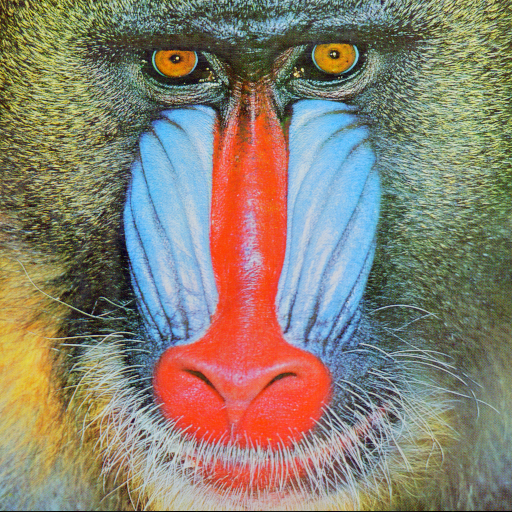

In [2]:
img = float.(testimage("mandrill"))

In [3]:
size(img)

(512, 512)

In [4]:
channels = channelview(img)

3×512×512 reinterpret(reshape, Float32, ::Array{RGB{Float32},2}) with eltype Float32:
[:, :, 1] =
 0.643137  0.470588  0.388235  0.25098   …  0.47451   0.494118  0.0352941
 0.588235  0.490196  0.290196  0.309804     0.580392  0.662745  0.0431373
 0.278431  0.243137  0.121569  0.188235     0.607843  0.658824  0.0470588

[:, :, 2] =
 0.247059  0.529412  0.517647  0.588235  …  0.482353  0.458824  0.0392157
 0.223529  0.380392  0.462745  0.564706     0.611765  0.592157  0.0470588
 0.121569  0.129412  0.180392  0.223529     0.588235  0.592157  0.0431373

[:, :, 3] =
 0.294118   0.215686   0.235294  0.443137  …  0.486275  0.47451   0.0431373
 0.168627   0.137255   0.160784  0.384314     0.588235  0.533333  0.0588235
 0.0392157  0.0901961  0.141176  0.137255     0.545098  0.521569  0.0470588

;;; … 

[:, :, 510] =
 0.458824  0.478431  0.462745  0.294118  …  0.431373  0.286275  0.0196078
 0.466667  0.54902   0.364706  0.301961     0.286275  0.329412  0.0313726
 0.266667  0.384314  0.352941  0.

In [6]:
function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
end

rank_approx (generic function with 1 method)

In [7]:
# For each channel, we do SVD decomposition, and then reconstruct the channel using only the K largest singular values.

# The image is compressed because for each channel we only need to save two small matrices and one vector – truncated part of 
        
# (U, S, V). For example, if the original image is gray image of size (512, 512), and we rebuild the image with 5050 singular
            
# values, then we only need to save 2 \times 512 \times 50 + 502×512×50+50 numbers to rebuild the image, 
            
# while original image has 512 \times 512512×512 numbers. 
                
# Hence this gives us a compression ratio 19.55\%19.55% if we don't consider the storage type.

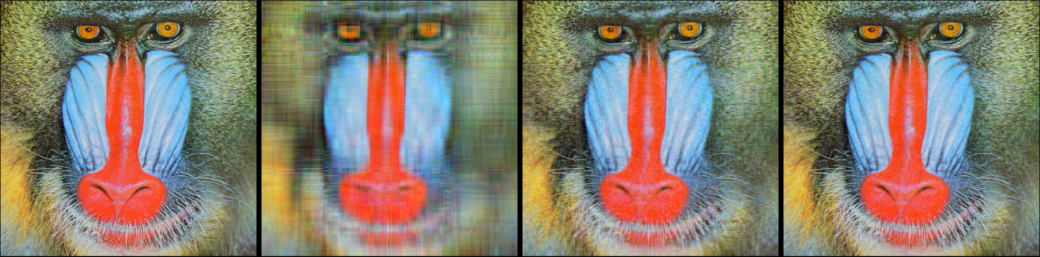

In [8]:
svdfactors = svd.(eachslice(channels; dims=1))
imgs = map((10, 50, 100)) do k
    colorview(RGB, rank_approx.(svdfactors, k)...)
end

mosaicview(img, imgs...; nrow=1, npad=10)

In [9]:
# From left to right: original image, reconstructed images using 10, 50, 100 largest singular values. 

# We can see that 5050 largest singular values are capable of rebuilding a pretty good image.